## **데이터 불러오기**
- df1 : 2024년 8월 27일 기준 ETF의 구성 종목 데이터
- df2 : 2022년 8월 27일부터 2024년 8월 27일까지 ETF의 배당 내역 데이터
- df3 : 2024년 05월 28일부터 2024년 08월 27일까지 ETF의 점수 정보
- df4 : 2024년 05월 28일부터 2024년 08월 27일까지 NH_CONTEST_NW_FC_STK_IEM_IFO.csv에 있는 종목 일자별 시세 정보
- df5 : 2024년 05월 28일부터 2024년 08월 27일까지 NH데이터 기반 주식 일별 정보.
- df6 : 2024년 05월 28일부터 2024년 08월 27일까지 NH데이터 기반 고객 보유 정보
- df7 : 2024년 05월 28일부터 2024년 08월 27일까지 유입/유출 종목 데이터

In [92]:
import pandas as pd
import numpy as np

# 미리 정제를 위한 함수를 지정하고
import re
def extract_text_only(text):
    # 정규표현식을 사용하여 알파벳이 아닌 문자를 제거
    return ' '.join(re.findall(r'[a-zA-Z]+', text))

# ETF 데이터 불러오기
df1 = pd.read_csv('DACON_ETF/NH_CONTEST_DATA_ETF_HOLDINGS.csv', encoding='euc-kr')

# 컬럼 이름 변환
df1 = df1.rename(columns={
    'etf_tck_cd': 'ETF',
    'tck_iem_cd': '구성종목',
    'mkt_vlu': '종목가치',
    'fc_sec_eng_nm': '영문명',
    'fc_sec_krl_nm': '한글명',
    'stk_qty': '주수',
    'wht_pct': '비중',
    'sec_tp': '타입'
})

# 데이터 정제
df1['ETF'] = df1['ETF'].apply(extract_text_only)

# ETF 배당 데이터 불러오기
df2 = pd.read_csv('DACON_ETF/NH_CONTEST_DATA_HISTORICAL_DIVIDEND.csv', encoding='euc-kr')

# 컬럼 이름 변환
df2 = df2.rename(columns={
    'etf_tck_cd': 'ETF',
    'ediv_dt': '배당락일',
    'ddn_amt': '배당금',
    'aed_stkp_ddn_amt': '수정배당금',
    'ddn_bse_dt': '배당 기준일',
    'ddn_pym_dt': '지급일',
    'pba_dt': '공시일',
    'ddn_pym_fcy_cd': '배당주기'
})

# 데이터 정제
df2['ETF'] = df2['ETF'].apply(extract_text_only)

# ETF 점수 데이터 가져오기
df3 = pd.read_csv('DACON_ETF/NH_CONTEST_ETF_SOR_IFO.csv', encoding='euc-kr')

# 컬럼 이름 변환
df3 = df3.rename(columns={
    'bse_dt': '거래일자',
    'etf_iem_cd': 'ETF',
    'mm1_tot_pft_rt': '1개월총수익률',
    'mm3_tot_pft_rt': '3개월총수익률',
    'yr1_tot_pft_rt': '1년총수익률',
    'etf_sor': '점수',
    'etf_z_sor': 'Z점수',
    'z_sor_rnk': 'Z점수순위',
    'acl_pft_rt_z_sor': '누적수익률Z점수',
    'ifo_rt_z_sor': '정보비율Z점수',
    'shpr_z_sor': '샤프지수Z점수',
    'crr_z_sor': '상관관계Z점수',
    'trk_err_z_sor': '트래킹에러Z점수',
    'mxdd_z_sor': '최대낙폭Z점수',
    'vty_z_sor': '변동성Z점수'
})

# 데이터 정제
df3['ETF'] = df3['ETF'].apply(extract_text_only)

# 주식 거래 데이터 가져오기
df4 = pd.read_csv('DACON_ETF/NH_CONTEST_STK_DT_QUT.csv', encoding='euc-kr')

# 컬럼 이름 변환
df4 = df4.rename(columns={
    'bse_dt': '거래일자', 'tck_iem_cd': '종목',
    'iem_ong_pr': '종목시가', 'iem_hi_pr': '종목고가',
    'iem_low_pr': '종목저가', 'iem_end_pr': '종목종가',
    'bf_dd_cmp_ind_pr': '전일대비증감가격', 'bf_dd_cmp_ind_rt': '전일대비증감률',
    'acl_trd_qty': '누적거래수량', 'trd_cst': '거래대금',
    'sll_cns_sum_qty': '매도체결합계수량', 'byn_cns_sum_qty': '매수체결합계수량',
    'sby_bse_xcg_rt': '환율'
})

# 데이터 정제
df4['종목'] = df4['종목'].apply(extract_text_only)

# 주식 정보 데이터 가져오기
df5 = pd.read_csv('DACON_ETF/NH_CONTEST_NHDATA_STK_DD_IFO.csv')

df5 = df5.rename(columns={
    'bse_dt': '일자', 'tck_iem_cd': '종목',
    'tot_hld_act_cnt': '총보유계좌수', 'tot_hld_qty': '총보유수량',
    'tco_avg_hld_qty': '당사평균보유수량', 'tco_avg_hld_wht_rt': '당사평균보유비중비율',
    'tco_avg_eal_pls': '당사평균평가손익', 'tco_avg_phs_uit_pr': '당사평균매입단가',
    'tco_avg_pft_rt': '당사평균수익률', 'tco_avg_hld_te_dd_cnt': '당사평균보유기간일수',
    'dist_hnk_pct10_nmv': '상위10', 'dist_hnk_pct30_nmv': '상위30',
    'dist_hnk_pct50_nmv': '상위50', 'dist_hnk_pct70_nmv': '상위70',
    'dist_hnk_pct90_nmv': '상위90', 'bse_end_pr': '기준종가',
    'lss_ivo_rt': '손실투자자비율', 'pft_ivo_rt': '수익투자자비율',
    'ifw_act_cnt': '신규매수계좌수', 'ofw_act_cnt': '전량매도계좌수',
    'vw_tgt_cnt': '종목조회건수', 'rgs_tgt_cnt': '관심종목등록건수'
})

# 데이터 정제
df5['종목'] = df5['종목'].apply(extract_text_only)

# 고객 데이터 가져오기
df6 = pd.read_csv('DACON_ETF/NH_CONTEST_NHDATA_CUS_TP_IFO.csv')

df6 = df6.rename(columns={
    'bse_dt': '기준일자',
    'tck_iem_cd': '종목',
    'cus_cgr_llf_cd': '대분류',
    'cus_cgr_mlf_cd': '중분류',
    'cus_cgr_act_cnt_rt': '계좌수비율',
    'cus_cgr_ivs_rt': '투자비율'
})

# 데이터 정제
df6['종목'] = df6['종목'].apply(extract_text_only)

# 유입/유출 데이터 가져오기
df7 = pd.read_csv('DACON_ETF/NH_CONTEST_NHDATA_IFW_OFW_IFO.csv')

df7 = df7.rename(columns={
    'bse_dt': '거래일자',
    'tck_iem_cd': '종목',
    'ifw_ofw_dit_cd': '유입/유출구분코드',
    'ifw_ofw_tck_cd': '유입/유출티커코드',
    'ifw_ofw_amt_wht_rt': '유입/유출금액비중',
    'ifw_ofw_rnk': '유입/유출순위'})

df7['종목'] = df7['종목'].apply(extract_text_only)

## **섹션 지정 및 피처 생성**
- 단기수익성 / 장기수익성 / 변동성 / 유동성 / 관심도 에 따라 피처들을 뽑아내어 데이터 전처리
- 후의 5개의 섹션별로 군집화를 수행하여 군집의 해석을 ETF에 라벨링

### **단기수익지표**
해당 종목으로부터 단기적인 수익을 기대할 수 있는지 측정
- 1개월 수익률 : 1개월 수익률을 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- 3개월 수익률 : 3개월 수익률을 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- MACD : 주가의 흐름을 추종하는 지표이며 12일 이동평균선과 26일 이동평균선 이용
- RSI : 과매수/과매도 여부를 알 수 있는 지표로 14일 이동평균을 이용. 70이 넘으면 일반적으로 과매수 상태

In [93]:
# 1. 1개월 수익률과 3개월 수익률의 지수이동평균

# 필요한 컬럼만 가져와서 ETF/거래일자별로 정렬
단기수익 = df3[['거래일자', 'ETF', '1개월총수익률', '3개월총수익률']].sort_values(['ETF', '거래일자'])
단기수익.set_index('거래일자', inplace=True)

# 1개월 수익률과 3개월 수익률의 지수이동평균 산출
span = 60
단기수익['1개월총수익률_EMA'] = 단기수익['1개월총수익률'].ewm(span=span, adjust=False).mean()
단기수익['3개월총수익률_EMA'] = 단기수익['3개월총수익률'].ewm(span=span, adjust=False).mean()
단기수익_EMA = 단기수익.groupby('ETF').last().reset_index()
단기수익_EMA = 단기수익_EMA[['ETF','1개월총수익률_EMA','3개월총수익률_EMA']]

# 2. 매수 타이밍을 정하깅 위한 MACD, RSI

# MACD(이동평균선을 통해 추세의 신호를 확인하는 지표) 산출
def MACD(df) :
    df['EMA_12'] = df['종목종가'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['종목종가'].ewm(span=26, adjust=False).mean()

    # MACD와 Signal Line 계산
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df = df.drop(['EMA_12', 'EMA_26'], axis=1)
    return df

# RSI(과매수/과매도 상태를 확인하는 지표) 산출
def RSI(df) :
    delta = df['종목종가'].diff()

    # 상승폭과 하락폭 구하기
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # AU, AD 계산
    window = 14  # RSI 기간
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    # RS와 RSI 계산
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

# MACD와 RSI 생성을 위한 일자별 종가 생성
etf_list = df1['ETF'].unique().tolist()
일자별종가 = df4[df4['종목'].isin(etf_list)][['거래일자', '종목', '종목종가']].sort_values(['종목', '거래일자'])
일자별종가.set_index('거래일자', inplace=True)
일자별종가

# # MACD 컬럼 생성 (가장 마지막 일자의 MACD로)
macd_list = []
for i in etf_list:
    df_종가 = 일자별종가[일자별종가['종목'] == i].copy()  # 복사하여 원본 데이터프레임을 보호
    if not df_종가.empty:
        df_macd = MACD(df_종가)
        macd_list.append(df_macd['MACD'].iloc[-1])  # 마지막 MACD 값으로
df_MACD = pd.DataFrame({'ETF' : etf_list, 'MACD' : macd_list}) 

df_MACD

# RSI 생성 (가장 마지막 일자의 RSI로)
RSI_list = []
for i in etf_list:
    df_종가 = 일자별종가[일자별종가['종목'] == i].copy()  # 복사하여 원본 데이터프레임을 보호
    if not df_종가.empty:
        df_rsi = RSI(df_종가)
        RSI_list.append(df_rsi['RSI'].iloc[-1]) # 마지막 RSI 값으로

df_RSI = pd.DataFrame({'ETF' : etf_list, 'RSI' : RSI_list}) 

# # 데이터 병합 및 단기지표 데이터 완성
단기수익지표 = 단기수익_EMA.merge(df_MACD, on='ETF', how='left')
단기수익지표 = 단기수익지표.merge(df_RSI, on='ETF', how='left')
단기수익지표.head()

,ETF,1개월총수익률_EMA,3개월총수익률_EMA,MACD,RSI
0,AIYY,-4.206078,-4.234522,NaN,NaN
1,AMZY,-4.186593,-1.523106,NaN,NaN
2,APLY,0.701422,10.715625,NaN,NaN
3,AWAY,-3.351309,-2.612645,-0.143535,57.493776
4,CIBR,0.061296,1.331835,0.966075,83.877996


### **장기수익지표**
해당 종목으로부터 장기적인 수익을 기대할 수 있는지 측정
- 1년 수익률 : 1년 수익률을 마지막 날짜 기준으로 지수이동평균 계산 (span=60)
- 누적 수익률 : 누적 수익률 Z점수를 마지막 날짜 기준으로 지수이동평균 계산 (span=60)
- 정보 비율 : 포트폴리오 기반 수익률과 추적오차로 계산. 여기서는 마지막 날짜 기준으로 지수이동평균 계산 (span=60)
    - 후에 진행한 상관분석에서 장기수익과 상관계수가 높아 장기수익 카테고리에서 관찰
- 샤프지수 : 포트폴리오 기반 수익률과 변동성로 계산. 여기서는 마지막 날짜 기준으로 지수이동평균 계산 (span=60)
    - 정보비율과 동일한 이유로 장기수익 카테고리에서 관찰
- 1년 배당수익 : 안정적인 수익으로서 1년 간 얻을 수 있는 배당금의 규모

In [94]:
# 1. 1년 수익률과 누적 수익률의 지수이동평균

# 1년 수익률과 누적 수익룰 점수 불러오기
장기수익 = df3[['거래일자', 'ETF', '1년총수익률', '누적수익률Z점수']].sort_values(['ETF', '거래일자'])
장기수익.set_index('거래일자', inplace=True)

# 1년 수익률과 누적 수익률의 지수이동평균 계산
span = 60
장기수익['1년수익률_EMA'] = 장기수익['1년총수익률'].ewm(span=span, adjust=False).mean()
장기수익['누적수익률Z점수_EMA'] = 장기수익['누적수익률Z점수'].ewm(span=span, adjust=False).mean()
장기수익_EMA = 장기수익.groupby('ETF').last().reset_index()
장기수익지표 = 장기수익_EMA[['ETF', '1년수익률_EMA','누적수익률Z점수_EMA']]

# 2. 정보비율과 샤프지수

# 정보비율과 샤프지수 데이터 불러오기
정보_샤프 = df3[['거래일자', 'ETF', '정보비율Z점수', '샤프지수Z점수']].sort_values(['ETF', '거래일자'])
정보_샤프.set_index('거래일자', inplace=True)

# 정보비율과 샤프지수의 지수이동평균 계산
span = 60
정보_샤프['정보비율_EMA'] = 정보_샤프['정보비율Z점수'].ewm(span=span, adjust=False).mean()
정보_샤프['샤프지수_EMA'] = 정보_샤프['샤프지수Z점수'].ewm(span=span, adjust=False).mean()
정보_샤프_EMA = 정보_샤프.groupby('ETF').last().reset_index()
정보_샤프_EMA = 정보_샤프_EMA[['ETF', '정보비율_EMA', '샤프지수_EMA']]

# 데이터 1차 병합
장기수익지표 = 장기수익지표.merge(정보_샤프_EMA, on='ETF')

# 3. 1년 배당수익

# 배당 데이터 불러오기
배당 =  df2[['ETF', '배당락일', '수정배당금', '배당주기']].sort_values(['ETF', '배당락일']).groupby('ETF').last().reset_index()
배당['배당주기'] = 배당['배당주기'].map({'Annual' : 1, 'Quarterly' : 4, 'Monthly' : 12})

# 1년 기준 배당 수익 계산
배당['1년_배당수익'] = 배당['수정배당금'] * 배당['배당주기']

# 데이터 2차 병합
장기수익지표 =  장기수익지표.merge(배당[['ETF', '1년_배당수익']], on ='ETF', how='inner')
장기수익지표.head()

,ETF,1년수익률_EMA,누적수익률Z점수_EMA,정보비율_EMA,샤프지수_EMA,1년_배당수익
0,AIYY,0.000000,0.106790,0.718323,0.181970,4.28400
1,AMZY,14.708866,11.412621,27.852952,7.497988,5.68320
2,APLY,8.655335,2.696522,7.697102,2.340439,4.19760
3,AWAY,7.674073,18.184831,31.710462,12.202529,0.14468
4,CIBR,22.713763,71.530743,75.007385,46.480294,0.26480


### **변동성 지표**
해당 종목의 시가 변동성(=위험성)을 측정
- 변동성 : 변동성 Z점수를 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- 최대낙폭`: 최대낙폭 Z점수를 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- 상관관계 : 상관관계 Z점수를 마지막날짜 기준으로 지수이동평균 계산 (span=60) _ 다른 종목들과 독립적일 때 변동성이 높을거라 판단 
- 트래킹에러 : 트래킹에러 Z점수를 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- 볼린저갭 : 볼린저밴드의 상한값과 하한값의 차이 
- 거래량 변동성 : 종목별로 60일 간의 거래량 표준편차 계산

In [95]:
# 1. 변동성 / 최대낙폭 / 상관관계 / 트래킹에러의 지수이동평균

# 혼합지표 중 변동성 데이터 불러오기
변동성 = df3[['거래일자', 'ETF', '변동성Z점수', '최대낙폭Z점수', '상관관계Z점수', '트래킹에러Z점수']].sort_values(['ETF', '거래일자'])
변동성.set_index('거래일자', inplace=True)

# 변동성 / 최대낙폭 / 상관관계 / 트래킹에러의 지수이동평균 산출
span = 60
변동성['변동성Z점수_EMA'] = 변동성['변동성Z점수'].ewm(span=span, adjust=False).mean()
변동성['최대낙폭Z점수_EMA'] = 변동성['최대낙폭Z점수'].ewm(span=span, adjust=False).mean()
변동성['상관관계Z점수_EMA'] = 변동성['상관관계Z점수'].ewm(span=span, adjust=False).mean()
변동성['트래킹에러Z점수_EMA'] = 변동성['트래킹에러Z점수'].ewm(span=span, adjust=False).mean()
변동성_z = 변동성.groupby('ETF').last().reset_index()
변동성_z = 변동성_z[['ETF','변동성Z점수_EMA', '최대낙폭Z점수_EMA', '상관관계Z점수_EMA', '트래킹에러Z점수_EMA']]

# 2. 볼린저밴드의 상한과 하한 간의 거리 (볼린저갭)

# 볼린저 밴드 함수 정의
def Bollinger(df) :
    df['Middle_Band'] = df['종목종가'].rolling(window=20).mean()

    # 표준편차 계산
    df['Standard_Deviation'] = df['종목종가'].rolling(window=20).std()

    # 상단 밴드와 하단 밴드 계산
    df['Upper_Band'] = df['Middle_Band'] + (df['Standard_Deviation'] * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Standard_Deviation'] * 2)
    df['gap'] = df['Upper_Band'] - df['Lower_Band']
    return df

# 볼린저 밴드 함수를 이용해 볼린저 갭 산출
gap_list = []
for i in etf_list:
    df_종가 = 일자별종가[일자별종가['종목'] == i].copy()  
    if not df_종가.empty:  #
        df_gap = Bollinger(df_종가)
        gap_list.append(df_gap['gap'].iloc[-1]) # 가장 마지막 날짜의 볼린저갭으로
볼린저갭 = pd.DataFrame({'ETF' : etf_list, '볼린저갭' : gap_list})

# 데이터 1차 병합
변동지표 = 변동성_z.merge(볼린저갭, on = 'ETF', how='left')

# 거래량_변동성 만들기
거래_변동 = df4[['거래일자', '종목','종목종가', '누적거래수량']].sort_values(['종목', '거래일자'])
거래_변동.set_index('거래일자', inplace=True)

# 거래변동성 산출
거래_변동 = 거래_변동.groupby('종목')['누적거래수량'].std().reset_index(name='거래_변동성')

변동지표 = 변동지표.merge(거래_변동, left_on = 'ETF', right_on='종목')
변동지표 = 변동지표.drop('종목', axis=1)

변동지표.head()

,ETF,변동성Z점수_EMA,최대낙폭Z점수_EMA,상관관계Z점수_EMA,트래킹에러Z점수_EMA,볼린저갭,거래_변동성
0,AIYY,1.365011,0.415061,15.735485,98.609937,NaN,66557.338039
1,AMZY,4.338080,9.105022,3.471188,96.226539,NaN,127543.798176
2,APLY,16.286093,4.445268,73.080393,81.414526,NaN,38836.294898
3,AWAY,11.824079,7.179712,18.453615,89.254805,1.824513,21830.347823
4,CIBR,18.669205,36.979540,36.563155,81.746695,9.563456,331796.674242


### **유동성 지표**
해당 종목에서 원활하게 유입/유출이 이루어지는를 측정
- 총거래금액 : 종목별로 60일 간의 총거래금액 합계 계산
- 매도매수_차이 : (매수수량-매도수량)/누적거래수량으로 계산. 매수세와 매도세 간의 균형 확인
- 유입변동성 : 종목과 일자에 따른 유입 금액 변동성 산출하고 이를 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- 유출변동성 : 종목과 일자에 따른 유출 금액 변동성 산출하고 이를 마지막날짜 기준으로 지수이동평균 계산 (span=60)

In [96]:
# 유입/유출 데이터 필요한 부분만 불러오기
유동 = df4[['거래일자', '종목','종목종가', '누적거래수량', '거래대금', '매도체결합계수량', '매수체결합계수량']].sort_values(['종목', '거래일자'])
유동.set_index('거래일자', inplace=True)

# 1. 거래 규모
# 60일 간의 거래대금을 모두 합하여 60일 간의 거래규모 산출
유동_거래_규모 = 유동.groupby('종목')['거래대금'].sum().reset_index(name='총거래금액')

# 2. 매수-매도 비율 차이
# 매수 수량과 매도 수량의 차이를 누적거래수량으로 나눴을 떄의 차이의 지수이동평균 _ 0에 가까울수록 균형
유동['매수-매도_비율'] =  (유동['매수체결합계수량'] - 유동['매도체결합계수량']) / 유동['누적거래수량']
span = 60
유동['매수매도_차이비율_EMA'] = 유동['매수-매도_비율'].ewm(span=span, adjust=False).mean()

# ETF별로 마지막 일자의 행만 가져와 1차 결합
유동 = 유동.groupby('종목').last().reset_index()[['종목', '매수매도_차이비율_EMA']]
유동지표 = 유동_거래_규모.merge(유동, on='종목')

# 3. 유입/유출의 변동성

# 유입/유출 데이터 정렬
유동_분산 = df7.sort_values(['종목', '거래일자'])
유동_분산.set_index('거래일자', inplace=True)

# 매수금액/매도금액 계산
df4['매수총금액'] = df4['종목종가'] * df4['매수체결합계수량']
df4['매도총금액'] = df4['종목종가'] * df4['매도체결합계수량']

# 유입/유출 데이터와 매수/매도 금액 데이터 결합
유동_분산 = df7.merge(df4[['거래일자', '종목', '매수총금액', '매도총금액']], on = ['거래일자', '종목'])
유동_분산 = 유동_분산.merge(df1[['ETF', '종목가치']], left_on='종목', right_on='ETF').drop('ETF', axis=1)

# 일자별 비중을 통해 ETF/일자별로 유입/유출 종목과 금액계산
유동_분산['유입/유출금액'] = 유동_분산.apply(lambda row: row['유입/유출금액비중'] * row['매수총금액'] if row['유입/유출구분코드'] == 1
                                 else row['유입/유출금액비중'] * row['매도총금액'], axis=1)
유동_분산['유입/유출금액'] = 유동_분산['유입/유출금액'] / 100
유동_분산 = 유동_분산.drop(['매수총금액', '매도총금액'],axis=1).set_index(['종목', '거래일자'])

# 일자별로 유입/유출금액의 편차 산출
유동_분산['유입/유출_변동성'] = 유동_분산.groupby(['거래일자', '종목', '유입/유출구분코드'])['유입/유출금액'].transform('std').fillna(0)
유동_분산['유입/유출_변동성'] = 유동_분산['유입/유출_변동성'] / 유동_분산['종목가치']

# 유입/유출 데이터 구분
유동_분산_유입 = 유동_분산[유동_분산['유입/유출구분코드']==1]
유동_분산_유출 = 유동_분산[유동_분산['유입/유출구분코드']==2]

# 유입금액과 유출금액의 편차의 변동성 계산
span = 60
유동_분산_유입['유입변동성_EMA'] = 유동_분산_유입['유입/유출_변동성'].ewm(span=span, adjust=False).mean()
유동_분산_유출['유출변동성_EMA'] = 유동_분산_유출['유입/유출_변동성'].ewm(span=span, adjust=False).mean()

# ETF별로 마지막 일자의 행만 가져와 2차 결합
유동_분산_유입 = 유동_분산_유입.groupby('종목').last().reset_index()[['종목', '유입변동성_EMA']]
유동_분산_유출 = 유동_분산_유출.groupby('종목').last().reset_index()[['종목', '유출변동성_EMA']]
유동_분산 = 유동_분산_유입.merge(유동_분산_유출, on = '종목')

# 최종데이터 생성
유동지표 = 유동지표.merge(유동_분산, on='종목', how='left')
유동지표 = 유동지표.rename(columns={'종목' : 'ETF'})
유동지표.head()

,ETF,총거래금액,매수매도_차이비율_EMA,유입변동성_EMA,유출변동성_EMA
0,AA,1.300124e+10,-0.046739,NaN,NaN
1,AAL,2.518015e+10,-0.115887,NaN,NaN
2,AAN,5.334333e+08,-0.116057,NaN,NaN
3,AAOI,1.140220e+09,0.002211,NaN,NaN
4,AAON,3.892870e+09,0.032502,NaN,NaN


### **관심도 지표**
현재 투자자들이 관심을 가지고 지켜보는 종목인지를 관찰
- 종목조회건수 : 종목별로 60일간 종목조회수 총합
- 관심종목등록건수 : 종목별로 60일간 관싱종목등록건수 총합
- 계좌수 증감률 : 일자별 총보유계좌수를 이용해 계좌수 증감률을 구하고 마지막날짜 기준으로 지수이동평균 계산 (span=60)
- 관심등록대비 신규매수계좌 : 신규매수계좌수/관심종목등록건수를 통해 실제 매수로 이어진 비율 산출

In [97]:
# 필요한 데이터 불러오기
관심도 = df5[['일자', '종목', '총보유계좌수', '상위10', '상위90', '기준종가', '수익투자자비율', '신규매수계좌수', '전량매도계좌수', '종목조회건수', '관심종목등록건수']].sort_values(['종목', '일자'])
관심도.set_index('일자', inplace=True)

# 1. 60일 간의 종목조회수, 관심종목등록건수 합계
# 종목조회수, 관심등록수, 신규매수계좌수의 합계 구하기
관심도_sum = 관심도.groupby('종목')[['종목조회건수', '관심종목등록건수', '신규매수계좌수']].sum()

# 2. 계좌수 증감률의 지수이동평균
# 60일 간의 계좌수 증감률을 구한뒤 지수이동편균 산출
관심도['계좌수_증감률'] = 관심도['총보유계좌수'].pct_change() * 100
관심도['계좌수_증감률_EMA'] = 관심도['계좌수_증감률'].ewm(span=60, adjust=False).mean()
관심도_updown = 관심도.groupby('종목').last().reset_index()
관심도_updown = 관심도_updown[['종목', '계좌수_증감률_EMA']]

# 데이터 1차 결합
관심지표 = 관심도_sum.merge(관심도_updown, on='종목')

# 3. 관심등록대비_신규매수계좌수
# 앞서 구한 관심종목등록수 합계와 신규매수계좌수 합계 활용
관심지표['관심대비매수'] = 관심지표['신규매수계좌수'] / 관심지표['관심종목등록건수']
관심지표 = 관심지표.rename(columns={'종목' : 'ETF'})
관심지표 = 관심지표.drop('신규매수계좌수', axis=1)
관심지표.head()

,ETF,종목조회건수,관심종목등록건수,계좌수_증감률_EMA,관심대비매수
0,AA,18477,534,-0.098652,0.252809
1,AAL,41381,434,4.067639,1.182028
2,AAN,1220,73,0.133892,0.095890
3,AAOI,1463,89,0.408329,0.123596
4,AAPB,7138,273,1.997675,0.747253


## **데이터 전처리**
### **데이터병합**
- 정리한 데이터 병합 및 컬럼 명칭 정리

In [98]:
# 데이터 병합
df_final = 단기수익지표.merge(장기수익지표, on='ETF')
df_final = df_final.merge(변동지표, on='ETF', how='left')
df_final = df_final.merge(유동지표, on='ETF')
df = df_final.merge(관심지표, on='ETF')

df.columns = ['ETF', '1개월_수익률', '3개월_수익률', 'MACD', 'RSI',
       '1년_수익률', '누적수익률(Z)', '정보비율(Z)', '샤프지수(Z)', '1년_배당수익', '변동성(Z)', '최대낙폭(Z)', '상관관계(Z)','트래킹에러(Z)',
       '볼린저갭', '거래_변동성', '총거래금액', '매수매도_차이비율', '유입금액_분산', '유출금액_분산', '종목조회수', '관심종목등록수', '계좌수증감률', '관심등록대비_매수계좌']
df.head()

,ETF,1개월_수익률,3개월_수익률,MACD,RSI,1년_수익률,누적수익률(Z),정보비율(Z),샤프지수(Z),1년_배당수익,...,볼린저갭,거래_변동성,총거래금액,매수매도_차이비율,유입금액_분산,유출금액_분산,종목조회수,관심종목등록수,계좌수증감률,관심등록대비_매수계좌
0,AIYY,-4.206078,-4.234522,NaN,NaN,0.000000,0.106790,0.718323,0.181970,4.28400,...,NaN,66557.338039,5.341927e+07,0.168037,NaN,NaN,2235,150,2.273351,0.380000
1,AMZY,-4.186593,-1.523106,NaN,NaN,14.708866,11.412621,27.852952,7.497988,5.68320,...,NaN,127543.798176,3.576710e+08,0.133246,NaN,NaN,1916,161,1.630706,0.472050
2,APLY,0.701422,10.715625,NaN,NaN,8.655335,2.696522,7.697102,2.340439,4.19760,...,NaN,38836.294898,7.886498e+07,0.363011,NaN,NaN,3332,211,4.348445,0.336493
3,AWAY,-3.351309,-2.612645,-0.143535,57.493776,7.674073,18.184831,31.710462,12.202529,0.14468,...,1.824513,21830.347823,2.034649e+07,-0.404043,NaN,NaN,519,18,4.031859,0.611111
4,CIBR,0.061296,1.331835,0.966075,83.877996,22.713763,71.530743,75.007385,46.480294,0.26480,...,9.563456,331796.674242,1.962477e+09,0.670285,-476.416135,-996.742013,5672,238,7.739907,0.441176


### **결측치 처리**
- MICE(Multiple Imputation by Chained Equations) : 결측치가 있는 데이터를 다른 컬럼을 이용한 회귀로 대체하는 방식을 반복적으로 수행
- MICE를 이용하여 같은 카테고리 안에 있는 피처들로 회귀 모델을 적용해 대체


In [99]:
# 결측치 처리 : MICE
from fancyimpute import IterativeImputer
import pandas as pd

# 같은 카테고리의 변수로 MICE 결측치 대체
columns_to_use1 = ['1개월_수익률', '3개월_수익률', 'MACD', 'RSI']
columns_to_use2 = ['변동성(Z)', '최대낙폭(Z)', '볼린저갭', '거래_변동성', '상관관계(Z)', '트래킹에러(Z)']
columns_to_use3 = ['총거래금액', '매수매도_차이비율', '계좌수증감률', '유입금액_분산', '유출금액_분산']

df_subset1 = df[columns_to_use1]
df_subset2 = df[columns_to_use2]
df_subset3 = df[columns_to_use3]

# MICE 방식으로 결측치 대체
imputer = IterativeImputer()
df_imputed1 = imputer.fit_transform(df_subset1)
df_imputed2 = imputer.fit_transform(df_subset2)
df_imputed3 = imputer.fit_transform(df_subset3)

# 대체한 값을 원래 데이터프레임에 다시 넣음
df[['1개월_수익률', '3개월_수익률', 'MACD', 'RSI']] = pd.DataFrame(df_imputed1, columns=columns_to_use1)
df[['변동성(Z)', '최대낙폭(Z)', '볼린저갭', '거래_변동성', '상관관계(Z)', '트래킹에러(Z)']] = pd.DataFrame(df_imputed2, columns=columns_to_use2)
df[['총거래금액', '매수매도_차이비율', '계좌수증감률', '유입금액_분산', '유출금액_분산']] = pd.DataFrame(df_imputed3, columns=columns_to_use3)

# 결과 확인
df.head()

,ETF,1개월_수익률,3개월_수익률,MACD,RSI,1년_수익률,누적수익률(Z),정보비율(Z),샤프지수(Z),1년_배당수익,...,볼린저갭,거래_변동성,총거래금액,매수매도_차이비율,유입금액_분산,유출금액_분산,종목조회수,관심종목등록수,계좌수증감률,관심등록대비_매수계좌
0,AIYY,-4.206078,-4.234522,0.480041,61.955961,0.000000,0.106790,0.718323,0.181970,4.28400,...,17.296371,66557.338039,5.341927e+07,0.168037,64826.809647,438.880146,2235,150,2.273351,0.380000
1,AMZY,-4.186593,-1.523106,0.564734,62.944303,14.708866,11.412621,27.852952,7.497988,5.68320,...,22.308037,127543.798176,3.576710e+08,0.133246,64809.183395,438.754869,1916,161,1.630706,0.472050
2,APLY,0.701422,10.715625,1.403311,80.975823,8.655335,2.696522,7.697102,2.340439,4.19760,...,1.605673,38836.294898,7.886498e+07,0.363011,64825.335498,438.869668,3332,211,4.348445,0.336493
3,AWAY,-3.351309,-2.612645,-0.143535,57.493776,7.674073,18.184831,31.710462,12.202529,0.14468,...,1.824513,21830.347823,2.034649e+07,-0.404043,64828.725657,438.893764,519,18,4.031859,0.611111
4,CIBR,0.061296,1.331835,0.966075,83.877996,22.713763,71.530743,75.007385,46.480294,0.26480,...,9.563456,331796.674242,1.962477e+09,0.670285,-476.416135,-996.742013,5672,238,7.739907,0.441176


## **섹션별 ETF 피처 셀렉션**
- ETF별로 단기수익성/장기수익성/변동성/유동성에 따른 하위 피처를 정리
---

### **단기수익성**
- 단기적인 수익을 기대할 수 있는지 측정
1. 1개월_수익률 : 1달 간 거둔 수익의 정도를 통해 단기적인 수익성 확인
2. 3개월_수익률 : 3달 간 거둔 수익의 정도를 통해 단기적인 수익성 확인
3. MACD : 추세의 변화를 추적하는 과매수-과매도 여부 측정 => 값이 양수이며 값이 크다면(=단기이평선이 장기이평선보다 크게 위에 있다) 과매수 상태이며 반대일 때 과매도 상태
4. RSI : 14일 간의 평균 상승폭과 하락폭으로 과매수-과매도를 판단하는 지표이며 수치가 높을수록 과매수 상태
  
### **장기수익성**
1. 1년_수익률 : 1년 간 거둔 수익의 정도를 통해 단기적인 수익성 확인
2. 누적수익률(Z) : Z점수로 스케일링된 누적 수익률. 높은 장기수익을 기대할 수 있는지를 평가
3. 1년_배당수익 : 1년 기준으로 해당 ETF를 가지고 있을 때 고정적으로 들어오는 수입
4. 정보비율(Z) : 위험 대비 성과를 측정한 지표. 누적수익률과 매우 높은 양의 상관
5. 샤프지수(Z) _ 정보 비율과 동일하게 위험 대비 성과를 측정한 지표. 누적수익률과 매우 높은 양의 상관

### **변동성**
1. 변동성(Z) : Z점수로 스케일링된 변동성. 높을수록 변동성이 안정되어 있음
2. 최대낙폭(Z) : 점수가 낮을 경우 변동성이 크며 위험성이 있음을 판단 가능
3. 볼린저갭 : 볼린저 밴드의 상한과 하한 간의 거리이며 넓을수록 변동성이 높을 것이라 판단
4. 거래변동성 : 거래 규모가 작은데 거래 대금의 변화가 높다면 변동성에 우려 발생
5. 트래킹에러(Z) : 시가를 추적했을 때 발생한 오차의 정도이며 높을수록 변동성의 영향이 크다고 해석 가능
6. 상관관계(Z) _ 해당 ETF가 다른 ETF와 얼마나 관계를 맺고 있는지를 의미하며 다른 ETF와 상관관계가 낮을 때 ETF의 변동성이 높아짐(변동성 Z점수는 내려감)

### **유동성**
1. 총거래금액 : 거래 규모로서 높을수록 안정적인 유동성을 기대할 수 있음
2. 매수매도_차이비율 : 0에 가깝다면 매수와 매도가 균형을 이루고 있다고 평가
3. 유입금액_분산 : 작을 때 자금의 유입이 일정하게 유지되는 상태로 판단
4. 유출금액_분산 : 작을 때 자금의 유출이 일정하게 유지되는 상태로 판단

### **관심도**
1. 계좌수_증감률 : 매수의 추세를 통해 실제 매수로 이어지는 관심도를 파악. 
2. 종목조회수 : 조회수를 통해 ETF의 관심도 평가. 높을수록 대중에게 일반화된 ETF로 인식
3. 관심종목등록수 : 종목 조회수에 비해 실질적인 관심도를 확인
4. 관심등록대비_매수계좌수 : 관심에서 실제 매수로 이어지는 관심도를 파악

In [100]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

df.head()

,ETF,1개월_수익률,3개월_수익률,MACD,RSI,1년_수익률,누적수익률(Z),정보비율(Z),샤프지수(Z),1년_배당수익,...,볼린저갭,거래_변동성,총거래금액,매수매도_차이비율,유입금액_분산,유출금액_분산,종목조회수,관심종목등록수,계좌수증감률,관심등록대비_매수계좌
0,AIYY,-4.206078,-4.234522,0.480041,61.955961,0.000000,0.106790,0.718323,0.181970,4.28400,...,17.296371,66557.338039,5.341927e+07,0.168037,64826.809647,438.880146,2235,150,2.273351,0.380000
1,AMZY,-4.186593,-1.523106,0.564734,62.944303,14.708866,11.412621,27.852952,7.497988,5.68320,...,22.308037,127543.798176,3.576710e+08,0.133246,64809.183395,438.754869,1916,161,1.630706,0.472050
2,APLY,0.701422,10.715625,1.403311,80.975823,8.655335,2.696522,7.697102,2.340439,4.19760,...,1.605673,38836.294898,7.886498e+07,0.363011,64825.335498,438.869668,3332,211,4.348445,0.336493
3,AWAY,-3.351309,-2.612645,-0.143535,57.493776,7.674073,18.184831,31.710462,12.202529,0.14468,...,1.824513,21830.347823,2.034649e+07,-0.404043,64828.725657,438.893764,519,18,4.031859,0.611111
4,CIBR,0.061296,1.331835,0.966075,83.877996,22.713763,71.530743,75.007385,46.480294,0.26480,...,9.563456,331796.674242,1.962477e+09,0.670285,-476.416135,-996.742013,5672,238,7.739907,0.441176


### **피처 스케일링**
- standardScaler()사용

In [101]:
# 스케일링 _ 피처들의 영향력을 균등하게 조정
scaler = StandardScaler()
df_t = df.set_index('ETF')
df_scaled = scaler.fit_transform(df_t)
df_scaled

array([[-1.87993701, -2.06726326, -0.62932603, ..., -0.52812641,
        -0.28410969, -0.6272162 ],
       [-1.87186444, -1.43418679, -0.55338629, ..., -0.52307908,
        -0.29937397, -0.20271247],
       [ 0.1531836 ,  1.42337978,  0.19852091, ..., -0.50013664,
        -0.23482139, -0.82785707],
       ...,
       [ 0.52812951,  0.00252507, -0.09937114, ..., -0.48086499,
        -0.34111359, -0.86673192],
       [ 1.26400438,  0.59167011, -0.02458934, ..., -0.29916089,
        -0.33038094, -0.54635191],
       [ 0.91355559,  0.10578155,  0.66242699, ..., -0.24455789,
        -0.30917428, -0.22993917]])

### **군집에 활용하기 위한 상관관계 관찰**
- 같은 분류의 피처 중 높은 상관관계를 가진 변수들을 같이 묶어 피처 단순화
- 섹션별로 하위 피처를 생성하여 이를 기반으로 군집화
- 현재 가지고 있는 피처들을 어떻게 결합할지 결정하기 위함 

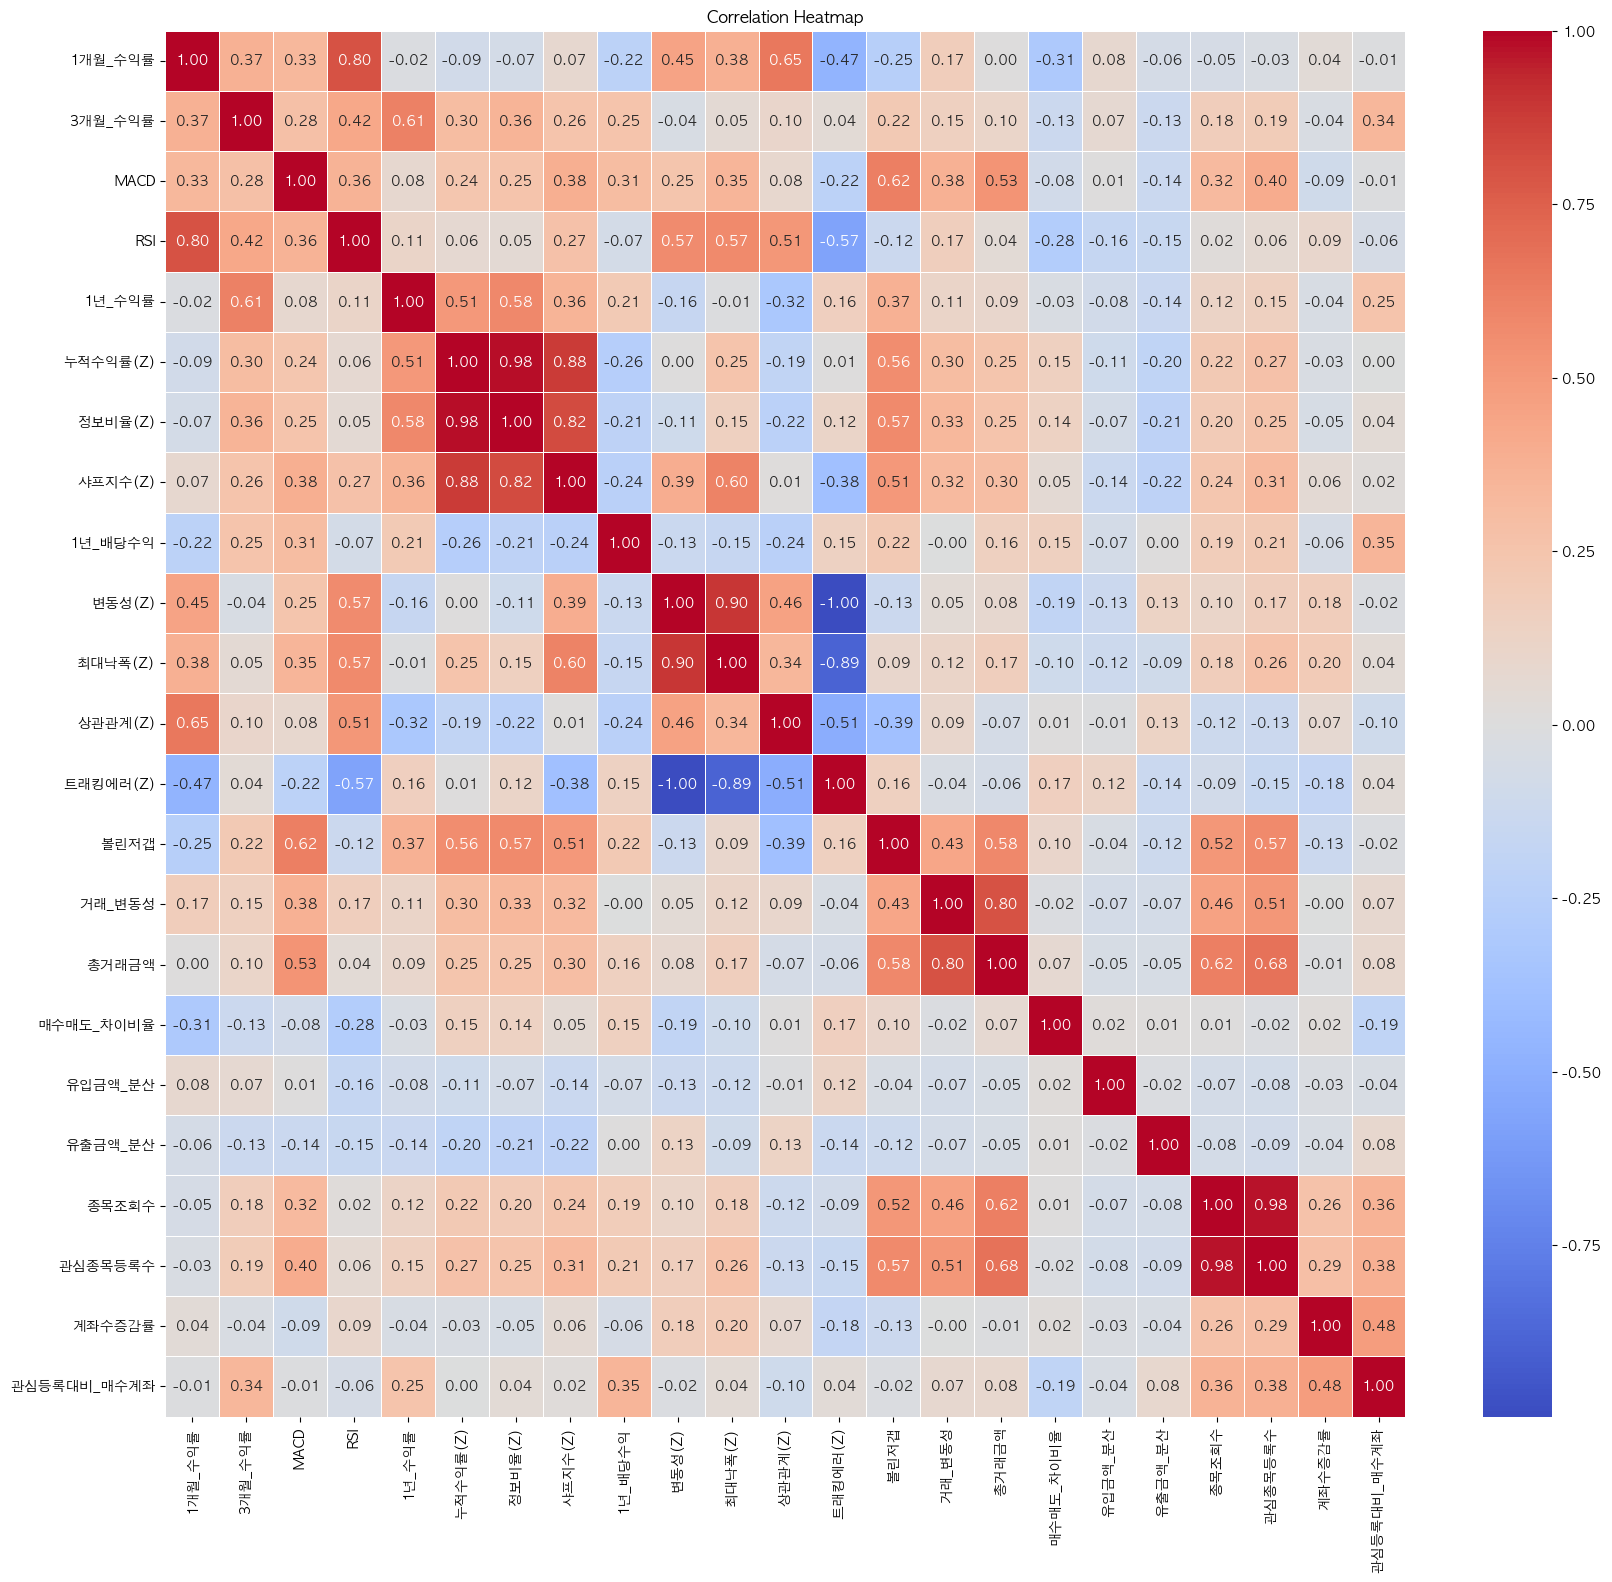

In [102]:
import seaborn as sns

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 스켕일링한 데이터를 데이터 프레임 형태로 정리
df_scaled = pd.DataFrame(df_scaled, columns = df_t.columns)

# 상관관계 계산
corr_matrix = df_scaled.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# 그래프 출력
plt.title('Correlation Heatmap')
plt.show()

### **섹션별 하위 피처 정리**
- **단기수익 피처** _ 변수 2개로 간소화
    - 수익(1개월 수익률, 3개월 수익률) : 단기간 보여준 수익성
    - 보조 지표(MACD, RSI) : 현재 추세를 파악하여 매수 타이밍 잡기
- **장기수익 피처** _ 변수 2개로 간소화
    - 수익(1년_수익률, 누적수익률(Z), 정보비율(Z), 샤프지수(Z)) : 장기간 보여준 수익성
    - 배당(1년_배당수익) : 배당금을 통해 얻을 수 있는 고정적인 수익
- **변동성 피처** _ 피처가 6개이며 상관관계의 양상이 다양하므로 주성분 분석 사용
    -  누적 분산이 90%이상 되는 지점으로 차원축소
- **유동성 피처** _ 변수 3개로 간소화
    - 거래 규모(총거래금액) : 3개월 간의 거래대금 총합으로 얼마나 많은 돈이 오고가는지 확인
    - 매수매도차이(매수매도_차이비율) : 매수 규모와 매도 규모의 균형이 맞는지 확인
    - 유입/유출금액의 분산(유입금액_분산, 유출금액_분산) : 유입금과 유출금의 규모가 불안정한지 확인
- **관심도 피처** _ 변수 2개로 간소화
    - 관심(종목조회수, 관심종목등록수) : ETF가 가지는 인지도
    - 매수 증가세(계좌수증감율, 관심종목대비_매수계좌) : 단순한 관심을 넘어 매수로 이어지는 정도
---
## **클러스터링**
- 단순화한 변수에 따라 각 섹션(단기수익/장기수익/변동성/유동성/관심도)별로 ETF를 KMeans Clustering<br>
- 실루엣 계수가 높은 지점 중에 의도에 맞게끔 군집화되는 시점에서 군집의 개수 k 선정<br>
- 군집의 결과를 해석하여 각 ETF에 라벨링

### **단기수익 클러스터링**

- 수익과 보조지표에 따라 ETF 군집화
    - 실루엣 계수가 떨어지지 않는 구간 중에 k 선정
    - 군집의 결과가 가장 의도에 맞게 나눠어진 5개의 군집으로 나누어 시각화하고 군집 해석

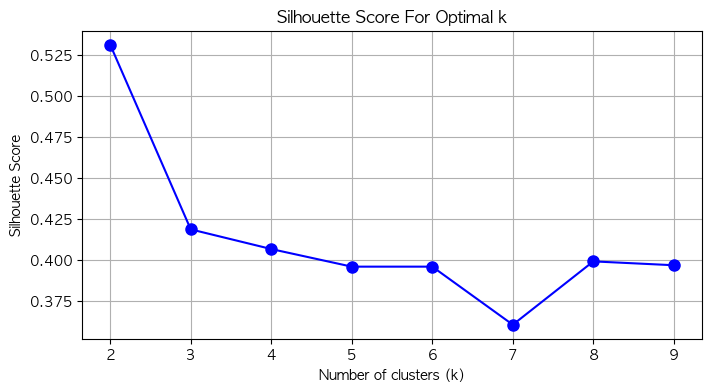

In [103]:
# 단기수익 클러스터링에 필요한 컬럼만 불러오기
단기수익_df = df_scaled[['1개월_수익률', '3개월_수익률', 'MACD', 'RSI']]

# 피처 간소화
단기수익_df['단기수익'] = 단기수익_df['1개월_수익률'] + 단기수익_df['3개월_수익률']
단기수익_df['보조지표'] = 단기수익_df['MACD'] + 단기수익_df['RSI']

# 두 데이터 모두 스케일링된 2개의 피처의 합이므로 추가 스케일링 X
단기수익_df = 단기수익_df[['단기수익', '보조지표']]

# K의 범위 설정
K_scale = range(2, 10)  # silhouette는 최소 2개 클러스터 필요

# 실루엣 계수를 저장할 리스트
silhouette_scores = []

# K값을 늘려가며 클러스터링 실시
for k in K_scale:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(단기수익_df)
    silhouette_avg = silhouette_score(단기수익_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 플롯
plt.figure(figsize=(8, 4))
plt.plot(K_scale, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.xticks(K_scale)
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


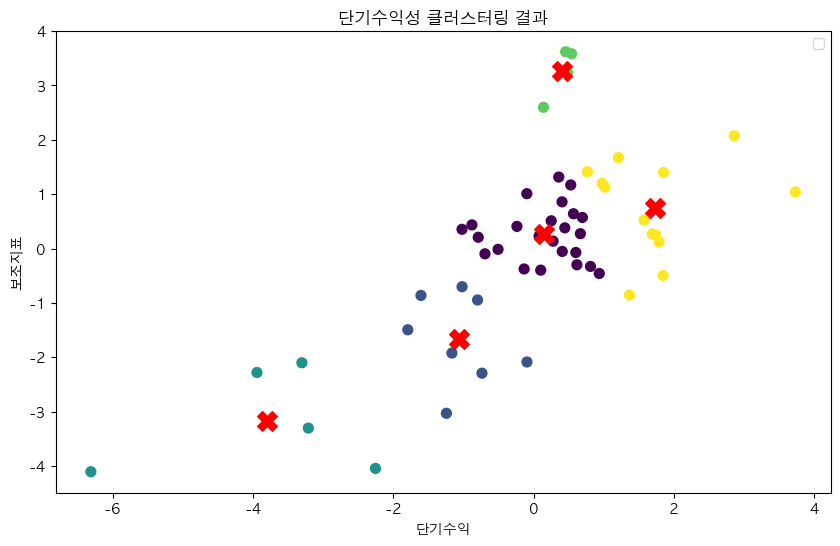

In [104]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 최적의 클러스터 수로 KMeans 클러스터링 수행
optimal_k_scale = 5  # 실루엣계수가 높아지는 k=7을 적절한 지점으로 선정
kmeans_scale = KMeans(n_clusters=optimal_k_scale, random_state=42)
clusters_scale = kmeans_scale.fit_predict(단기수익_df)

# 클러스터링 결과를 원본 데이터프레임에 추가
단기수익_df['Cluster_scale'] = clusters_scale

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(단기수익_df.iloc[:, 0], 단기수익_df.iloc[:, 1], c=clusters_scale, cmap='viridis', s=50)
plt.scatter(kmeans_scale.cluster_centers_[:, 0], kmeans_scale.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('단기수익')
plt.ylabel('보조지표')
plt.title('단기수익성 클러스터링 결과')
plt.legend()
plt.show()

### **장기수익 클러스터링하기**
- 장기수익과 배당금으로 ETF 군집화
    - 실루엣 계수가 높은 지점 중 7을 최적의 k로 선정
        - 4일 때가 더 높지만 보다 다양한 해석을 위해 조금 더 군집이 나뉘어지는 7 선택
    - 7개의 군집으로 나누어 시각화하고 군집 해석

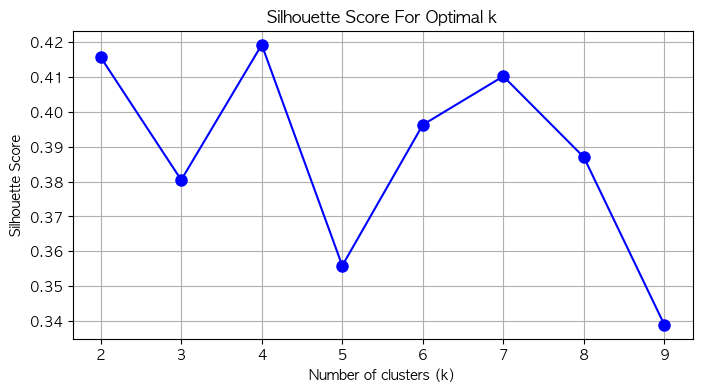

In [105]:
# 장기수익 클러스터링에 필요한 컬럼만 불러오기
장기수익_df = df_scaled[['1년_수익률', '누적수익률(Z)', '정보비율(Z)','샤프지수(Z)', '1년_배당수익']]

# 피처 간소화
# 배당 컬럼과의 균형을 위해 4개의 컬럼의 평균으로 계산
장기수익_df['장기수익'] =  0.25*장기수익_df['1년_수익률'] + 0.25*장기수익_df['누적수익률(Z)'] + 0.25*장기수익_df['정보비율(Z)'] + 0.25*장기수익_df['샤프지수(Z)']
장기수익_df = 장기수익_df[['장기수익', '1년_배당수익']]

# K의 범위 설정
K_scale = range(2, 10)  # silhouette는 최소 2개 클러스터 필요

# 실루엣 계수를 저장할 리스트
silhouette_scores = []

# K값을 늘려가며 클러스터링 실시
for k in K_scale:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(장기수익_df)
    silhouette_avg = silhouette_score(장기수익_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 플롯
plt.figure(figsize=(8, 4))
plt.plot(K_scale, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.xticks(K_scale)
plt.grid()
plt.show()

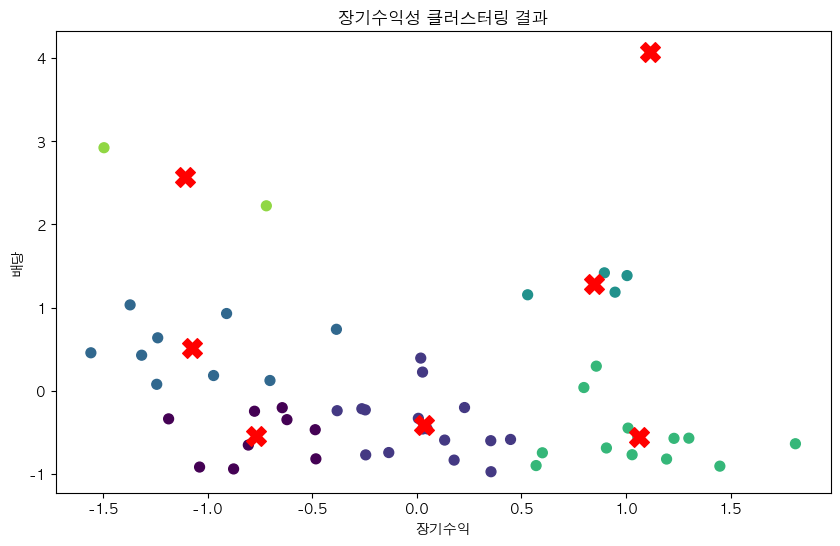

In [106]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 최적의 클러스터 수로 KMeans 클러스터링 수행
optimal_k_scale = 7  # 실루엣계수가 높아지는 k=7을 적절한 지점으로 선정
kmeans_scale = KMeans(n_clusters=optimal_k_scale, random_state=42)
clusters_scale = kmeans_scale.fit_predict(장기수익_df)

# 클러스터링 결과를 원본 데이터프레임에 추가
장기수익_df['Cluster_scale'] = clusters_scale

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(장기수익_df.iloc[:, 0], 장기수익_df.iloc[:, 1], c=clusters_scale, cmap='viridis', s=50)
plt.scatter(kmeans_scale.cluster_centers_[:, 0], kmeans_scale.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('장기수익')
plt.ylabel('배당')
plt.title('장기수익성 클러스터링 결과')
plt.show()

### **변동성 클러스터링하기**
- 변동성 피처가 많고 상관관계의 양상이 다양했으므로 주성분 분석으로 차원을 축소한 뒤 ETF 군집화
- **주성분분석**
    - 데이터의 복잡성을 줄이도록 피처 간의 선형 결합을 바탕으로 차원을 축소시키는 방법
    - 주성분은 설명력 보존을 위해 누적 분산이 90%를 넘어가는 3개로 차원 축소
- 차원축소된 데이터프레임으로 관찰했을 때 실루엣 계수가 높아지는 4를 최적의 k 선정
    - 2가 더 높지만 다양한 군집 해석을 위해 4 선택
    - 4개로 군집을 나누고 주성분이 3개이므로 3차원 시각화

차원의 개수가 2 일 때
누적 분산은 0.7790903835678624
차원의 개수가 3 일 때
누적 분산은 0.9259768755961925
차원의 개수가 4 일 때
누적 분산은 0.9832618233818703
차원의 개수가 5 일 때
누적 분산은 0.999769966654692
차원의 개수가 6 일 때
누적 분산은 0.9999999999999999


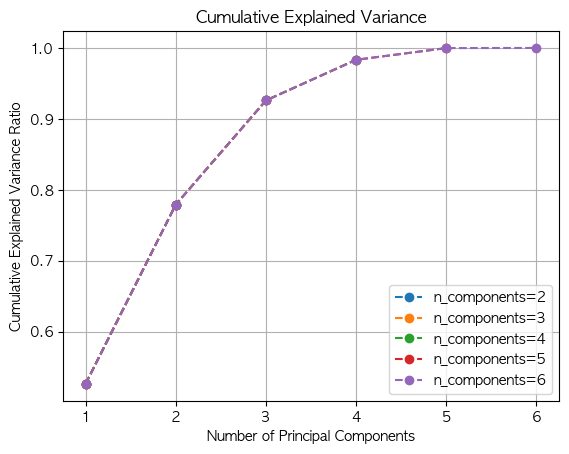

In [107]:
# 변동성 클러스터링에 필요한 컬럼만 불러오기
변동성_df = df_scaled[['변동성(Z)', '최대낙폭(Z)', '상관관계(Z)', '트래킹에러(Z)','볼린저갭', '거래_변동성']]

# 주성분분석
# 차원의 개수 올려보면서 적절한 차원 개수 선정관찰
for i in range(2,7) :
    pca = PCA(n_components = i)
    pca.fit(변동성_df)
    print(f'차원의 개수가 {i} 일 때')
    variance_t = 0
    variance = []
    for j in range(i) :
        v_ratio = pca.explained_variance_ratio_[j]
        variance_t += v_ratio
        variance.append(variance_t)
    plt.plot(range(1, i + 1), variance, marker='o', linestyle='--', label=f'n_components={i}')
    print(f'누적 분산은 {np.sum(pca.explained_variance_ratio_)}')

# 누적 분산 관찰 => 최초로 90% 이상이 되는 지점 포착
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

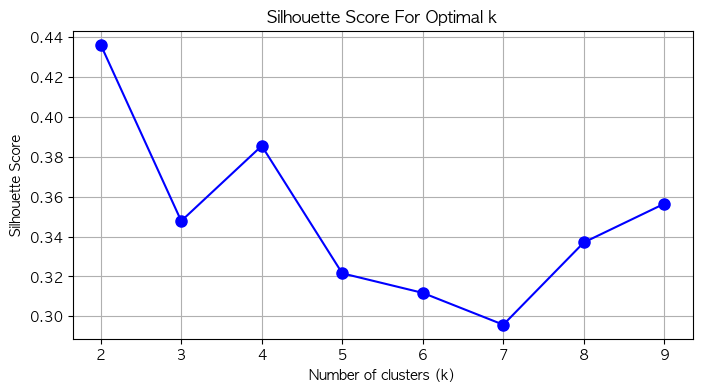

In [108]:
# 데이터 다시 불러오기
변동성_df = df_scaled[['변동성(Z)', '최대낙폭(Z)', '상관관계(Z)', '트래킹에러(Z)','볼린저갭', '거래_변동성']]

# 위에서 선정한 개수를 토대로 차원축소
k = 3
pca = PCA(n_components=k)
변동성_df_pca = pca.fit_transform(변동성_df)

# K의 범위 설정
K_scale = range(2, 10)

# 실루엣 계수를 저장할 리스트
silhouette_scores = []

# K값을 늘려가며 클러스터링 실시
for k in K_scale:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(변동성_df_pca)
    silhouette_avg = silhouette_score(변동성_df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 플롯
plt.figure(figsize=(8, 4))
plt.plot(K_scale, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.xticks(K_scale)
plt.grid()
plt.show()

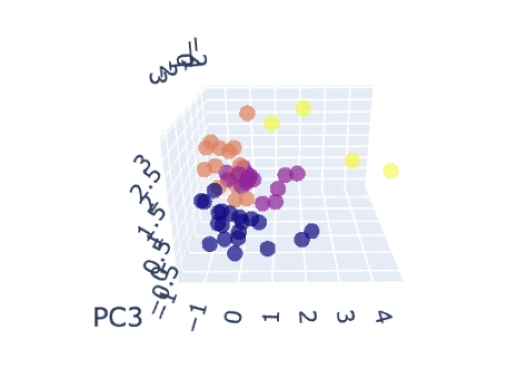

In [112]:
from PIL import Image
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 최적의 클러스터 수로 KMeans 클러스터링 수행
optimal_k_scale = 4 # 실루엣계수가 상대적으로 높은 k=4를 적절한 지점으로 선정
kmeans_scale = KMeans(n_clusters=optimal_k_scale, random_state=42)
clusters_scale = kmeans_scale.fit_predict(변동성_df_pca)

# 클러스터링 결과를 데이터프레임으로 추가
변동성_df_pca = pd.DataFrame(변동성_df_pca, columns=['PC1', 'PC2', 'PC3'])
변동성_df_pca['Cluster_scale'] = clusters_scale

# 시각화를 위한 라이브러리
import plotly.express as px

# # 3D 시각화
# fig = px.scatter_3d(변동성_df_pca, x='PC1', y='PC2', z='PC3', title='cluster',
#                     color='Cluster_scale',  # 클러스터별 색상 구분
#                     opacity=0.7)

# fig.update_traces(marker=dict(size=5))
# fig.show()

# 이미지 불러오기
image_path = 'DACON_ETF/변동성군집결과.png'  # 이미지 파일 경로
img = Image.open(image_path)

# 이미지 보여주기
plt.imshow(img)
plt.axis('off')  # 축 없애기
plt.show()

### **유동성 지표**
- 거래 규모와 매수매도의 차이, 유입/유출금액의 분산으로 ETF 군집화
    - 실루엣 계수가 높은 지점 중 5를 최적의 k로 선정
    - 5개의 군집으로 나누고 선정 피처가 3개이므로 3차원 시각화하고 군집 해석

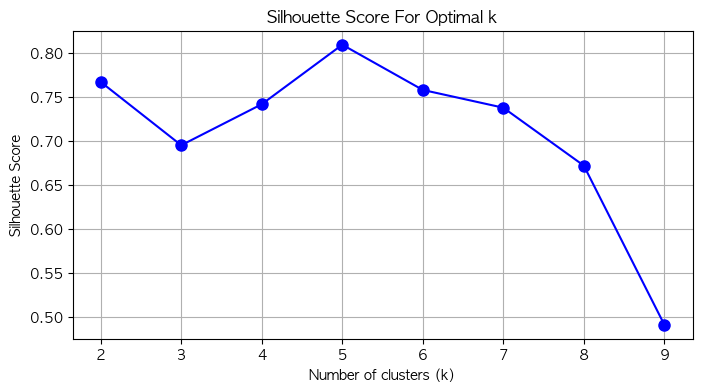

In [76]:
# 유동성 클러스터링에 필요한 컬럼만 불러오기
유동성_df = df_scaled[['총거래금액', '매수매도_차이비율', '유입금액_분산', '유출금액_분산']]

# 유입유출_분산을 통합할 때 다른 단일 컬럼들과의 수치 균형이 맞도록 평균으로 계산
유동성_df['유입유출_분산'] = (유동성_df['유입금액_분산'] + 유동성_df['유출금액_분산'])/2
유동성_df = 유동성_df[['총거래금액', '매수매도_차이비율', '유입유출_분산']]
유동성_df

# K의 범위 설정
K_scale = range(2, 10)  # silhouette는 최소 2개 클러스터 필요

# 실루엣 계수를 저장할 리스트
silhouette_scores = []

# K값을 늘려가며 클러스터링 실시
for k in K_scale:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(유동성_df)  # 클러스터 라벨 얻기
    silhouette_avg = silhouette_score(유동성_df, cluster_labels)  # 실루엣 계수 계산
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 플롯
plt.figure(figsize=(8, 4))
plt.plot(K_scale, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.xticks(K_scale)
plt.grid()
plt.show()

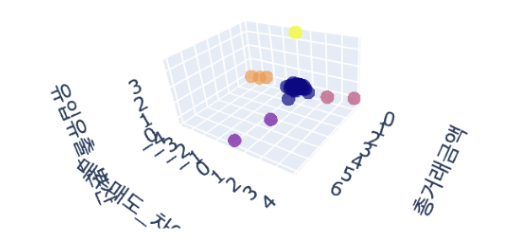

In [113]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 최적의 클러스터 수로 KMeans 클러스터링 수행
optimal_k_scale = 5 # 실루엣계수가 가장 높은 k=5을 적절한 지점으로 선정
kmeans_scale = KMeans(n_clusters=optimal_k_scale, random_state=42)
clusters_scale = kmeans_scale.fit_predict(유동성_df)

# 클러스터링 결과를 원본 데이터프레임에 추가
유동성_df['Cluster_scale'] = clusters_scale

import plotly.express as px

# # 3D 시각화
# fig = px.scatter_3d(유동성_df, x='총거래금액', y='매수매도_차이비율', z='유입유출_분산', title='cluster',
#                     color='Cluster_scale',  # 클러스터 색상으로 구분
#                     opacity=0.7)

# fig.update_traces(marker=dict(size=5))  # 마커 크기 조정
# fig.show()

# 이미지 불러오기
image_path = 'DACON_ETF/유동성군집결과.png'  # 이미지 파일 경로
img = Image.open(image_path)

# 이미지 보여주기
plt.imshow(img)
plt.axis('off')  # 축 없애기
plt.show()

### **관심도 클러스터링**
- 관심의 정도와 매수 증가세로 ETF 군집화
    - 실루엣 계수가 높은 지점 중 4를 최적의 k로 선정
        - 2일 때가 더 높지만 보다 다양한 해석을 위해 조금 더 군집이 나뉘어지는 4 선택
    - 4개의 군집으로 나누어 시각화하고 군집 해석

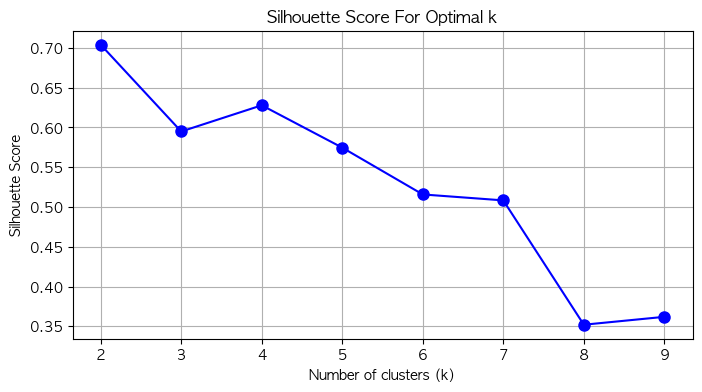

In [114]:
# 관심도 클러스터링에 필요한 컬럼만 불러오기
관심도_df = df_scaled[['종목조회수', '관심종목등록수', '계좌수증감률', '관심등록대비_매수계좌']]

# 관심, 매수 증가 모두 2개 컬럼의 결합이므로 추가적인 스케일링 X
관심도_df['관심'] = 관심도_df['종목조회수'] + 관심도_df['관심종목등록수']
관심도_df['매수증가'] = 관심도_df['계좌수증감률'] + 관심도_df['관심등록대비_매수계좌']
관심도_df = 관심도_df[['관심', '매수증가']]

# K의 범위 설정
K_scale = range(2, 10)  # silhouette는 최소 2개 클러스터 필요

# 실루엣 계수를 저장할 리스트
silhouette_scores = []

# K값을 늘려가며 클러스터링 실시
for k in K_scale:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(관심도_df)
    silhouette_avg = silhouette_score(관심도_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 플롯
plt.figure(figsize=(8, 4))
plt.plot(K_scale, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.xticks(K_scale)
plt.grid()
plt.show()

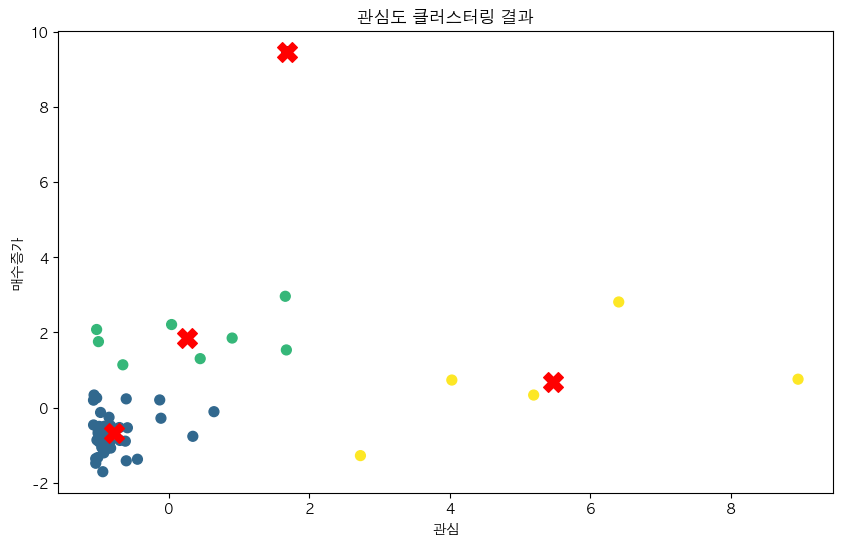

In [115]:
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 최적의 클러스터 수로 KMeans 클러스터링 수행
optimal_k_scale = 4  # 실루엣계수가 상대적으로 높아지는 k=4를 적절한 지점으로 선정
kmeans_scale = KMeans(n_clusters=optimal_k_scale, random_state=42)
clusters_scale = kmeans_scale.fit_predict(관심도_df)

# 클러스터링 결과를 원본 데이터프레임에 추가
관심도_df['Cluster_scale'] = clusters_scale

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(관심도_df.iloc[:, 0], 관심도_df.iloc[:, 1], c=clusters_scale, cmap='viridis', s=50)
plt.scatter(kmeans_scale.cluster_centers_[:, 0], kmeans_scale.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('관심')
plt.ylabel('매수증가')
plt.title('관심도 클러스터링 결과')
plt.show()

## **군집 해석 및 라벨링**
- 각 군집별로 해석하여 매핑된 군집에 라벨링

In [116]:
# 클러스터 넘버로 ETF 데이터 매핑
df_cluster = pd.DataFrame({'ETF' : df['ETF'], '단기수익' : 단기수익_df['Cluster_scale'],
                           '장기수익' : 장기수익_df['Cluster_scale'], '변동성' : 변동성_df_pca['Cluster_scale'],
                           '유동성' : 유동성_df['Cluster_scale'], '관심도' : 관심도_df['Cluster_scale']})
df_cluster.head()

,ETF,단기수익,장기수익,변동성,유동성,관심도
0,AIYY,2,2,1,0,1
1,AMZY,2,2,1,0,1
2,APLY,4,2,2,0,1
3,AWAY,2,0,1,0,1
4,CIBR,0,4,2,0,1


### **변동성 군집 해석**
- 변동성의 경우 명확한 피처가 아닌 주성분으로 축소하여 군집화했으므로 추가적인 분석이 필요
- 박스 플롯을 관찰하여 군집의 특성 파악

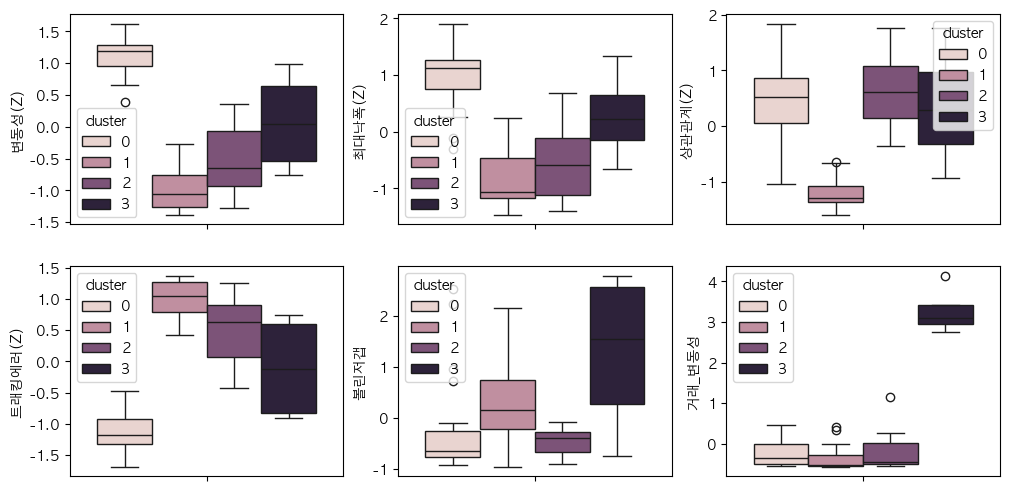

In [117]:
# 변동성 군집 해석을 위한 추가 관찰
변동성_cluster = 변동성_df
변동성_cluster['ETF'] = df['ETF']
변동성_cluster['cluster'] = 변동성_df_pca['Cluster_scale']
변동성_cluster.sort_values('cluster')

# 박스플롯 시각화
fig, ax = plt.subplots(2,3, figsize=(12,6))
for i, j in enumerate(변동성_cluster.columns[:6]) :
    ax = ax.flatten()
    sns.boxplot(y=j, data=변동성_cluster, hue='cluster', ax = ax[i])

### **라벨링**
- 최종 해석 결과를 매핑한 데이터프레임 생성

In [118]:
# 기초 통게량을 반영하여 해석

#  단기수익성 군집별 해석 및 라벨링
df_cluster['단기수익'] = df_cluster['단기수익'].map({0: '단기 수익이 거의 존재하지 않으며 과매수나 과매도 상태에 속하지 않음',
                                             1: '작은 단기손실이 우려되며 과매수나 과매도 상태에 속해있지 않음',
                                             2: '단기손실이 우려되며 과매도 상태에 속해있음',
                                             3: '작은 단기 수익을 기대할 수 있며 과매수 상태에 속해있음',   
                                             4: '단기수익을 기대할 수 있으며 과매수 상태에 속해있음'})
#  장기수익성 군집별 해석 및 라벨링
df_cluster['장기수익'] = df_cluster['장기수익'].map({0: '낮은 장기 수익을 기대할 수 있으며 배당 수익이 낮음',
                                             1: '평균 이상의 장기 수익이 발생하며 배당수익이 낮음',
                                             2: '낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음',
                                             3: '큰 장기 수익을 기대할 수 있으며 높은 배당수익을 기대할 수 있음',
                                             4: '매우 큰 장기 수익을 기대할 수 있지만 배당수익이 낮음',
                                             5: '평균 정도의 장기 수익을 기대할 수 있으며 높은 배당수익을 기대할 수 있음',
                                             6: '큰 장기 수익을 기대할 수 있으며 매우 높은 배당수익을 기대할 수 있음'})
#  변동성 군집별 해석 및 라벨링
df_cluster['변동성'] = df_cluster['변동성'].map({0: '변동성이 매우 낮으며 다른 ETF와의 상관관계가 높음',
                                             1: '변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음',
                                             2: '변동성이 크며 다른 ETF와의 상관관계가 높음',
                                             3: '변동성이 낮은 편이며 거래 규모의 편차가 존재함'})
#  유동성 군집별 해석 및 라벨링
df_cluster['유동성'] = df_cluster['유동성'].map({0: '거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음',
                                             1: '거래규모가 크며 유입과 유출이 모두 일정하게 유출되고 있음',
                                             2: '거래 규모가 크지 않으며 유입의 규모가 유출의 규모보다 큼',
                                             3: '거래 규모가 크지 않으며 유출의 규모가 유입의 규모보다 큼',
                                             4: '거래 규모가 크지 않으며 유입과 유출의 규모 변동이 큼'})
#  관심도 군집별 해석 및 라벨링
df_cluster['관심도'] = df_cluster['관심도'].map({0: '관심도가 높으며 매수의 증가 추세가 매우 가파름',
                                             1: '관심도가 낮으며 매수의 증가 추세가 미진함',
                                             2: '관심도가 있으며 매수의 증가 추세가 뚜렷함',
                                             3: '관심도가 있으며 매수의 증가 추세가 존재함'})
df_cluster.head()

,ETF,단기수익,장기수익,변동성,유동성,관심도
0,AIYY,단기손실이 우려되며 과매도 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음,변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함
1,AMZY,단기손실이 우려되며 과매도 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음,변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함
2,APLY,단기수익을 기대할 수 있으며 과매수 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음,변동성이 크며 다른 ETF와의 상관관계가 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함
3,AWAY,단기손실이 우려되며 과매도 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 배당 수익이 낮음,변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함
4,CIBR,단기 수익이 거의 존재하지 않으며 과매수나 과매도 상태에 속하지 않음,매우 큰 장기 수익을 기대할 수 있지만 배당수익이 낮음,변동성이 크며 다른 ETF와의 상관관계가 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함


## **활용 데이터 정리**
- ETF 데이터 + 가장 최근 일자의 종가 데이터 결합
- 앞서 구했던 수치 변수와도 결합하여 데이터프레임 완성

### **종가 데이터와 결합**

In [119]:
# 종가 데이터 결합 정리
# 필요한 부분만 가져오기
종가 = df4.groupby('종목').last().reset_index()
종가 = 종가[['종목', '종목종가']]

# 종가 + 군집화 결과 정리한 데이터프레임 생성
ETF = 종가.merge(df_cluster, left_on ='종목', right_on = 'ETF').drop('종목', axis=1)
ETF = ETF[['ETF', '종목종가', '단기수익', '장기수익', '변동성', '유동성', '관심도']]

# 수치 데이터와 병합
ETF = ETF.merge(df, on='ETF')
ETF.head(3)

,ETF,종목종가,단기수익,장기수익,변동성,유동성,관심도,1개월_수익률,3개월_수익률,MACD,...,볼린저갭,거래_변동성,총거래금액,매수매도_차이비율,유입금액_분산,유출금액_분산,종목조회수,관심종목등록수,계좌수증감률,관심등록대비_매수계좌
0,AIYY,13.14,단기손실이 우려되며 과매도 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음,변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함,-4.206078,-4.234522,0.480041,...,17.296371,66557.338039,53419272.0,0.168037,64826.809647,438.880146,2235,150,2.273351,0.380000
1,AMZY,20.63,단기손실이 우려되며 과매도 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음,변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함,-4.186593,-1.523106,0.564734,...,22.308037,127543.798176,357671009.0,0.133246,64809.183395,438.754869,1916,161,1.630706,0.472050
2,APLY,18.11,단기수익을 기대할 수 있으며 과매수 상태에 속해있음,낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음,변동성이 크며 다른 ETF와의 상관관계가 높음,거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음,관심도가 낮으며 매수의 증가 추세가 미진함,0.701422,10.715625,1.403311,...,1.605673,38836.294898,78864980.0,0.363011,64825.335498,438.869668,3332,211,4.348445,0.336493


## **LLM 준비**
### **필요한 라이브러리 다운로드 받기**

In [ ]:
!pip install chromadb
!pip install langchain-community
!pip -q install langchain pypdf chromadb sentence-transformers faiss-gpu
!pip install faiss-gpu
!pip install langchain
!pip install openai
!pip install tiktoken
!pip install langchain_openai
!pip install -U langchain langchain_experimental -q

In [31]:
# 필요한 라이브러리 설치
from langchain.vectorstores import Chroma
from langchain_community.vectorstores import FAISS
from langchain_community.llms import HuggingFaceEndpoint
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA, ConversationalRetrievalChain
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

from langchain_community.document_loaders import CSVLoader
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFaceHub
from dotenv import load_dotenv

import os
import warnings
import langchain_openai

from langchain_openai.embeddings import OpenAIEmbeddings
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain_openai import OpenAIEmbeddings

warnings.filterwarnings("ignore")

### **데이터 준비**

In [35]:
# RAG 활용을 위한 데이터 전처리

# 소수점 이하 2자리 제거
ETF = ETF.round(2)

# tabular 데이터 형태를 자연어 텍스트 변환
def prepare_data_for_rag(df):
    df['text'] = (
        "ETF 이름은 " + df['ETF'].astype(str) + "입니다, " +
        df['ETF'].astype(str) + " 종목 종가는 " + df['종목종가'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 단기 수익은 " + df['단기수익'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 장기 수익은 " + df['장기수익'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 변동성은 " + df['변동성'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 유동성은 " + df['유동성'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 관심도은 " + df['관심도'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 1개월 수익률은 " + df['1개월_수익율'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 3개월 수익률은 " + df['3개월_수익율'].astype(str) + "입니다. " +
        df['ETF'].astype(str) +  "MACD은 " + df['MACD'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 볼린저 갭은 " + df['볼린저갭'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 거래 변동성은 " + df['거래_변동성'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 총 거래 금액은 " + df['총거래금액'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 매수매도 차이 비율은 " + df['매수매도_차이비율'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 유입 금액 분산은 " + df['유입금액_분산'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 유출 금액 분산은 " + df['유출금액_분산'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 종목 조회수는 " + df['종목조회수'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 관심 종목 등록 수는 " + df['관심종목등록수'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 계좌 수 증감률은 " + df['계좌수증감률'].astype(str) + "입니다. " +
        df['ETF'].astype(str) + " 관심 등록 대비 매수 계좌는 " + df['관심등록대비_매수계좌'].astype(str) + "입니다."
    )

    rag_data = df[['ETF', 'text']].copy()

    return rag_data

# ETF명 컬럼과 해당 ETF에 관련한 정보를 담고 있는 text 컬럼
rag_ready_data = prepare_data_for_rag(ETF)
rag_ready_data.head()

,ETF,text
0,AIYY,"ETF 이름은 AIYY입니다, AIYY 종목 종가는 13.14입니다. AIYY 단기..."
1,AMZY,"ETF 이름은 AMZY입니다, AMZY 종목 종가는 20.63입니다. AMZY 단기..."
2,APLY,"ETF 이름은 APLY입니다, APLY 종목 종가는 18.11입니다. APLY 단기..."
3,AWAY,"ETF 이름은 AWAY입니다, AWAY 종목 종가는 19.9입니다. AWAY 단기 ..."
4,CIBR,"ETF 이름은 CIBR입니다, CIBR 종목 종가는 52.79입니다. CIBR 단기..."


### **CSVLoader**
- langchain_community 라이브러리의 document_loaders 모듈의 CSVLoader 클래스를 사용하여 CSV 파일에서 데이터 로드
- CSV 파일의 각 행을 추출하여 서로 다른 Document 객체로 변환
- 문서 객체로 이루어진 리스트 형태로 반환

In [36]:
# csv 형태로 저장
rag_ready_data.to_csv('DACON_ETF/rag_ready_data.csv', index=False)

### **GPT API 불러오기**

In [37]:
# GPT API key
api_key = "access_key"
os.environ['OPENAI_API_KEY'] = api_key

In [39]:
# CSV 파일 로드
loader = CSVLoader(file_path="DACON_ETF/rag_ready_data.csv")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[20].page_content[:650]}")
print(f"\n[metadata]\n{docs[20].metadata}\n")

문서의 수: 54

[페이지내용]
ETF: JEPI
text: ETF 이름은 JEPI입니다, JEPI 종목 종가는 56.75입니다. JEPI 단기 수익은 단기 수익이 거의 존재하지 않으며 과매수나 과매도 상태에 속하지 않음입니다. JEPI 장기 수익은 낮은 장기 수익을 기대할 수 있으며 일정한 배당수익을 기대할 수 있음입니다. JEPI 변동성은 변동성이 매우 낮으며 다른 ETF와의 상관관계가 높음입니다. JEPI 유동성은 거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음입니다. JEPI 관심도은 관심도가 있으며 매수의 증가 추세가 뚜렷함입니다. JEPI 1개월 수익률은 1.04입니다. JEPI 3개월 수익률은 2.35입니다. JEPIMACD은 0.41입니다. JEPI 볼린저 갭은 3.89입니다. JEPI 거래 변동성은 1152771.4입니다. JEPI 총 거래 금액은 10786989720.0입니다. JEPI 매수매도 차이 비율은 0.06입니다. JEPI 유입 금액 분산은 0.26입니다. JEPI 유출 금액 분산은 0.0입니다. JEPI 종목 조회수는 113635입니다. JEPI 관심 종목 등록 수는 3428입니다. JEPI 계좌 수 증감률은 105.66입니다. JEPI 관심 등록 대비 매수 계좌는 0.69입니다.

[metadata]
{'source': 'DACON_ETF/rag_ready_data.csv', 'row': 20}



### **Text split**
- RecursiveCharacterTextSplitter 클래스는 텍스트를 재귀적으로 분할하여 의미적으로 관련 있는 텍스트 조각들이 같이 있도록함.
- 분할된 청크들이 설정된 chunk_size보다 작아질 때까지 분할 과정을 반복
- 여기서 chunk_overlap은 분할된 텍스트 조각들 사이에서 중복으로 포함될 문자 수를 의미

In [40]:
# 문서 분할 단계로 각 청크의 최대 길이를 설정해주고 인접한 청크 간에 겹치는 문자의 수를 지정
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=650,
    chunk_overlap=50,
    add_start_index=True
)
splits = text_splitter.split_documents(docs)

# 분할된 텍스트 조각들의 총 수
len(splits)

54

In [44]:
splits[24]

Document(metadata={'source': 'DACON_ETF/rag_ready_data.csv', 'row': 24, 'start_index': 0}, page_content='ETF: MGK\ntext: ETF 이름은 MGK입니다, MGK 종목 종가는 326.38입니다. MGK 단기 수익은 단기수익을 기대할 수 있으며 과매수 상태에 속해있음입니다. MGK 장기 수익은 매우 큰 장기 수익을 기대할 수 있지만 배당수익이 낮음입니다. MGK 변동성은 변동성이 매우 크며 다른 ETF와의 상관관계가 낮아 독립성이 높음입니다. MGK 유동성은 거래 규모가 크지 않으며 유입과 유출이 모두 일정하게 유지되고 있음입니다. MGK 관심도은 관심도가 낮으며 매수의 증가 추세가 미진함입니다. MGK 1개월 수익률은 0.33입니다. MGK 3개월 수익률은 8.82입니다. MGKMACD은 2.39입니다. MGK 볼린저 갭은 42.98입니다. MGK 거래 변동성은 194775.1입니다. MGK 총 거래 금액은 6861579618.0입니다. MGK 매수매도 차이 비율은 0.24입니다. MGK 유입 금액 분산은 0.09입니다. MGK 유출 금액 분산은 0.29입니다. MGK 종목 조회수는 5247입니다. MGK 관심 종목 등록 수는 252입니다. MGK 계좌 수 증감률은 1.52입니다. MGK 관심 등록 대비 매수 계좌는 0.46입니다.')

### **Embedding & Vectorstore**
- 임베딩(Embedding)은 텍스트 데이터를 숫자로 이루어진 벡터로 변환하는 과정
- OpenAI사의 임베딩모델을 사용
- 벡터 저장소(Vector Store)는 벡터 형태로 표현된 데이터, 즉 임베딩 벡터들을 효율적으로 저장하고 검색할 수 있는 시스템이나 데이터베이스를 의미
- 대규모 벡터 데이터셋에서 빠른 속도로 가장 유사한 항목을 찾아내는 것이 목표

In [47]:
# 임베딩 벡터를 데이터베이스에 저장하기 위한 오픈소스 소프트웨어로 Chroma 라이브러리 사용
vectorstore = Chroma.from_documents(
    documents=splits, embedding=OpenAIEmbeddings())
retriever = vectorstore.as_retriever(search_type="similarity")

## **RAG 기반 LLM 모델 생성**
- LLM은 RAG에서 검색된 정보를 바탕으로 고품질의 자연어 응답을 생성하는 핵심 역할을 수행
- 사용자에게 정확하고 유용한 정보를 제공
- 사용 모델은 *ChaptGPT의 gpt-4-turbo-preview*
    - temperature 하이퍼파라미터는 모델의 출력의 다양성과 창의성을 조절하는 역할로 0~1사이의 값으로 조절
    - 숫자가 높을수록 창의적인 답변 생성

In [50]:
# ChaptGPT의 gpt-4-turbo-preview 모델을 사용한 LLM 모델 생성 
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
llm = ChatOpenAI(temperature=0.3, model="gpt-4-turbo-preview")

### **QA서비스**
- 일반적인 rag chain을 구성하는 것을 넘어서 질문자의 이전 질문을 이해하는 QA 시스템 구축을 위해 채팅 기록을 인식하는 검색기인 create_history_aware_retriever를 사용
- 생성된 RAG 체인에 사용자의 질문과 이전의 대화 기록을 입력값을 넣게 되면 그에 대한 답변을 LLM이 생성

In [51]:
# 사용자 질문과 채팅 기록을 기반으로 독립적인 질문을 형성하는 시스템 프롬프트
contextualize_q_system_prompt = """Given a chat history and the latest user question \
which might reference context in the chat history, formulate a standalone question \
which can be understood without the chat history. Do NOT answer the question, \
just reformulate it if needed and otherwise return it as is."""

# 채팅 기록과 사용자의 최신 질문을 바탕으로 질문을 변경하는 프롬프트 템플릿 생성
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),  # 시스템 메시지
        MessagesPlaceholder("chat_history"),         # 채팅 기록 자리 표시자
        ("human", "{input}"),                        # 사용자 질문 자리 표시자
    ]
)

# 채팅 기록을 인식하는 검색기 생성, 검색기의 기능은 사용자의 질문이나 주어진 컨텍스트에 가장 관련된 정보를 찾아내는 과정으로.
#사용자의 입력을 바탕으로 쿼리를 생성하고, 인덱싱된 데이터에서 가장 관련성 높은 정보를 검색하여 출력해준다.
history_aware_retriever = create_history_aware_retriever(
    llm,  # 대형 언어 모델
    retriever,  # 기본 검색기
    contextualize_q_prompt  # 질문 변경 프롬프트
)

# 질문 응답 시스템 프롬프트
qa_system_prompt = """You are an assistant for question-answering tasks. \
Use the following pieces of retrieved context to answer the question. \
If you don't know the answer, just say that you don't know. \
Use three sentences maximum and keep the answer concise.\
Please answer in Korean.\

{context}"""

# 질문 응답을 위한 프롬프트 템플릿 생성
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", qa_system_prompt),                 # 시스템 메시지
        MessagesPlaceholder("chat_history"),          # 채팅 기록 자리 표시자
        ("human", "{input}"),                         # 사용자 질문 자리 표시자
    ]
)

# 질문 응답 체인 생성
question_answer_chain = create_stuff_documents_chain(llm, qa_prompt)

# RAG 체인 검색기와 질문 응답 체인을 결합
rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

In [56]:
# ETF 종목에 대한 QA 시스템 구축

# 질문자의 질문 기록을 담아두는 리스트 형성
chat_history = []

# ETF 이름 입력 받기
etf_name = input("알고 싶은 ETF의 이름을 입력하세요: ")

# ETF에 대한 질문 생성
question = f"{etf_name}에 대한 정보를 알려주세요."

# AI의 응답 요청
ai_msg = rag_chain.invoke({"input": question, "chat_history": chat_history})

# 대화 이력에 질문과 응답 추가
chat_history.extend([HumanMessage(content=question), ai_msg["answer"]])

# AI의 응답 출력
print(f"답변: {ai_msg['answer']}")

# 추가 질문을 위한 반복 구조
while True:
    follow_up_question = input("추가 질문이 있으면 입력하세요 (종료하려면 '종료' 입력): ")

    if follow_up_question.lower() == '종료':
        print("질문을 종료합니다.")
        break

    # AI의 응답 요청
    ai_msg_follow_up = rag_chain.invoke({"input": follow_up_question, "chat_history": chat_history})

    # 대화 이력에 후속 질문과 응답 추가
    chat_history.extend([HumanMessage(content=follow_up_question), ai_msg_follow_up["answer"]])

    # AI의 응답 출력
    print(f"답변: {ai_msg_follow_up['answer']}")

알고 싶은 ETF의 이름을 입력하세요:  JEPI


답변: JEPI는 낮은 장기 수익과 일정한 배당수익을 기대할 수 있는 ETF입니다. 변동성이 매우 낮으며 다른 ETF와의 상관관계가 높습니다. 관심도가 있으며 매수의 증가 추세가 뚜렷합니다.


추가 질문이 있으면 입력하세요 (종료하려면 '종료' 입력):  종가가 얼마죠?


답변: JEPI 종목 종가는 56.75입니다.


추가 질문이 있으면 입력하세요 (종료하려면 '종료' 입력):  요 한 달은 수익률이 어땠나요?


답변: JEPI 1개월 수익률은 1.04입니다.


추가 질문이 있으면 입력하세요 (종료하려면 '종료' 입력):  근 1년을 봤을 때 장기투자로서 좋던가요? 단기투자로서 좋던가요?


답변: JEPI는 낮은 장기 수익을 기대할 수 있으며, 단기 수익이 거의 존재하지 않는다고 합니다. 따라서 단기투자보다는 일정한 배당수익을 기대할 수 있는 장기투자에 더 적합할 수 있습니다.


추가 질문이 있으면 입력하세요 (종료하려면 '종료' 입력):  종료


질문을 종료합니다.
